<a href="https://colab.research.google.com/github/RalphLynnMora/Coding-Projects/blob/main/Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X:
[[ 0.96853364 -0.88087441]
 [-0.9125758   0.85308445]
 [ 0.63513889  1.45025272]
 [ 1.26766695  1.28966665]
 [ 1.12670749  0.88506745]
 [ 1.48410316  1.14089678]
 [ 1.33507955  1.288349  ]
 [ 1.05235526 -0.80961143]
 [-0.92623671  0.42920403]
 [ 0.90799206  1.41330621]
 [ 1.45597731 -1.14058351]
 [-0.58237397 -1.22302792]
 [-1.45628551 -1.28720866]
 [-1.20805648  0.61969754]
 [ 0.86349782 -0.60593575]
 [-0.67303622 -1.21529887]
 [-1.63261962 -1.53180927]
 [-1.16698726 -1.36140028]
 [-1.44522906  0.91257826]
 [ 0.91856264 -0.67306999]
 [-0.72593146 -1.61416473]
 [-0.83050406 -1.36256903]
 [-1.32531407 -1.00749915]
 [-1.35672652 -1.29896316]
 [-1.06289048  0.93521748]
 [ 0.84854864 -1.02180968]
 [-0.83155807 -0.95572136]
 [-1.35150218  0.8319877 ]
 [ 0.66409904  1.52968143]
 [ 0.99161118 -1.21608619]
 [-0.85223058  0.63325801]
 [ 0.65108851 -0.62668899]
 [-1.23285569  0.82252573]
 [ 0.68598349  1.03187242]
 [ 1.14615352  0.96631203]
 [ 1.20939298  1.0489827 ]
 [ 0.98928409  0.9312774 

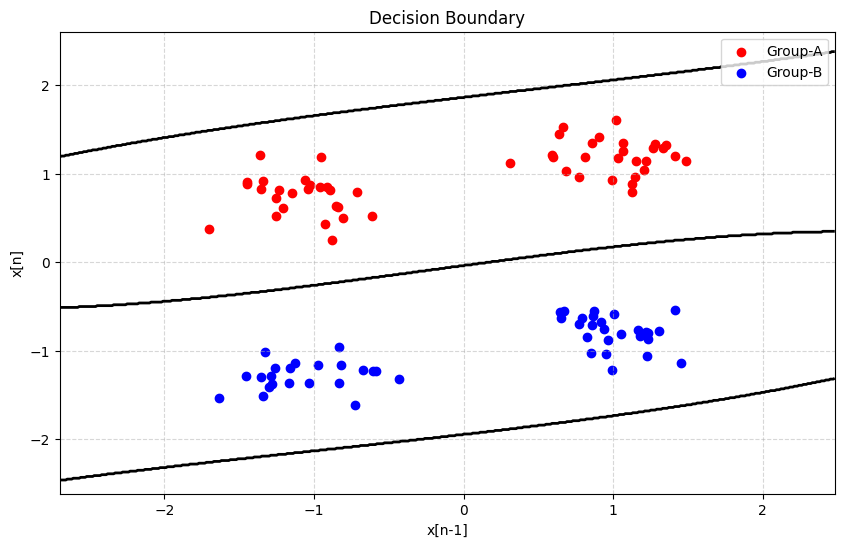

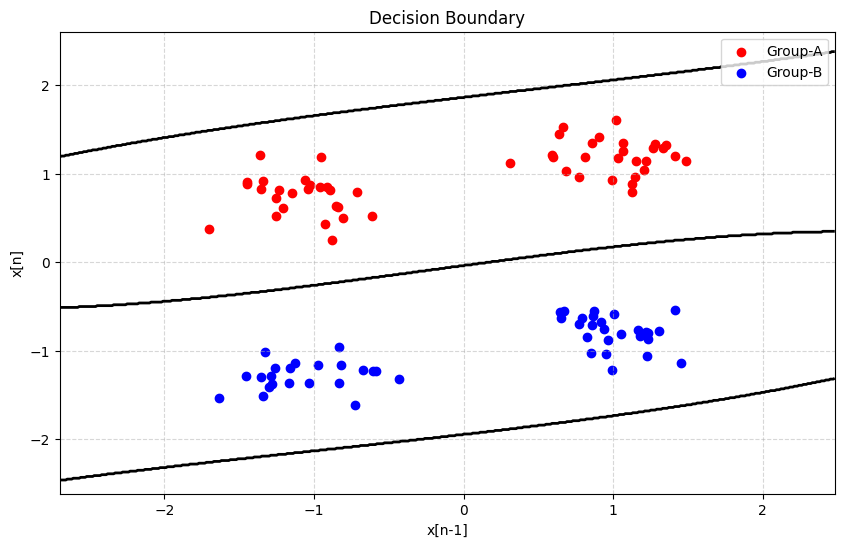

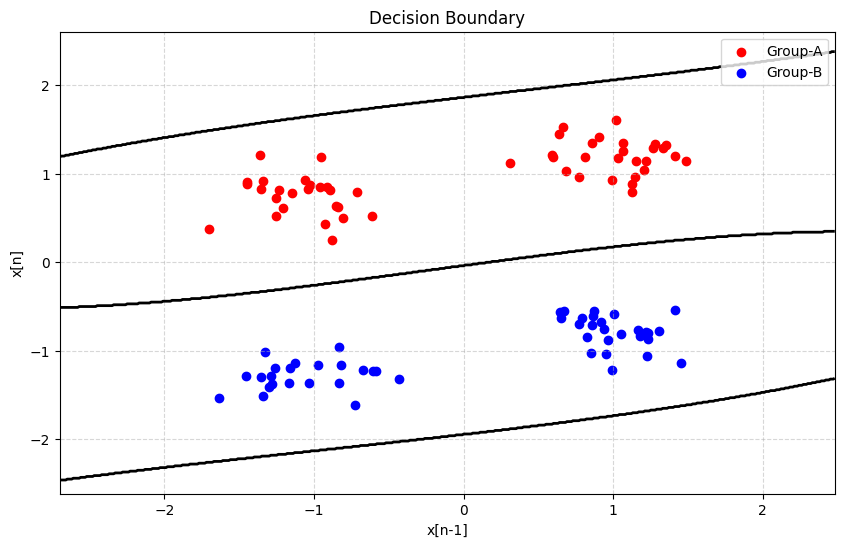

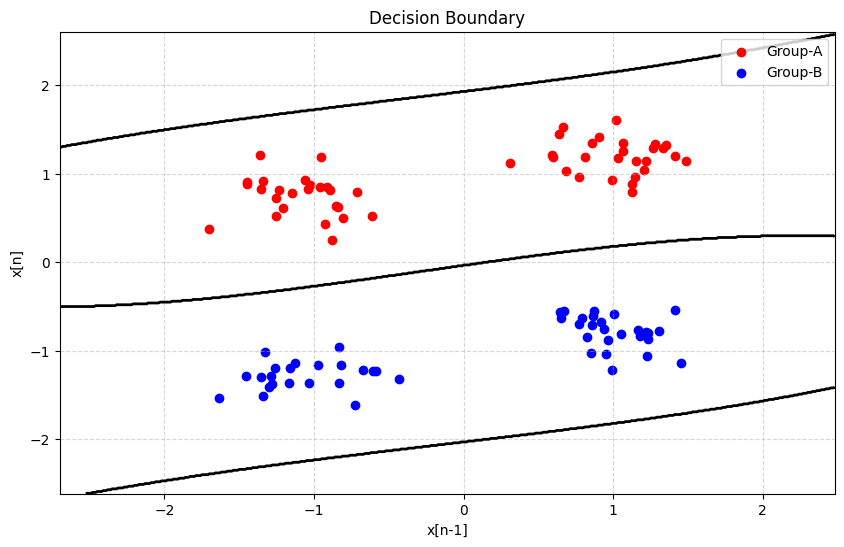

In [ ]:
# importing all the important libraries.
import numpy as np
import matplotlib.pyplot as plt

# Funtion to generate dataset
def data(N, a):
    N = N + 3
    h = np.array([1, a])
    y = np.sign(np.random.randn(N))
    t = np.arange(N)
    z = np.convolve(h, y)
    z = z[1:N-1]
    y = y[2:N-1]
    X = np.array([z[0:N-3], z[1:N-2]]).T
    X = X + 0.2 * np.random.randn(N-3, 2)
    return X, y

# visulaization of data.
X_train, y_train = data(100, 0.2)
print("X:")
print(X_train)
print("\ny:")
print(y_train)


# This block contains all the funtion required to be create in the task.
# Polynomial kernel k(x_i, x_j) = (x_i^T x_j + 1)^3
def polynomial_kernel(X1, X2):
    return (np.dot(X1, X2.T) + 1) ** 3
# Compute the kernel matrix with the polynomial kernel
K_train = polynomial_kernel(X_train, X_train)

# Regularization constant and identity matrix
reg_constant = 1e-6
identity_matrix = np.identity(K_train.shape[0])
# Calculate the dual weights (alpha values)
alpha = np.linalg.solve(K_train + reg_constant * identity_matrix, y_train)
# Create a mesh grid for plotting
xx, yy = np.meshgrid(np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.01),
                     np.arange(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 0.01))
X_test = np.c_[xx.ravel(), yy.ravel()]
# Dual form estimator function with the polynomial kernel
def dual_estimator(X_test, X_train, alpha):
    kernel_values = polynomial_kernel(X_test, X_train)
    return np.sign(np.dot(kernel_values, alpha))


# Plot the Decision Boundary
Z = dual_estimator(X_test, X_train, alpha)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], marker='o', color='r', label='Group-A')
plt.scatter(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], marker='o', color='b', label='Group-B')
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'], linewidths=[2])
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.legend(loc='best')
plt.title("Decision Boundary")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Ridge Regression solution, this is α=〖(Κ+ΥI)〗^(-1) y
# Compute the kernel matrix
def compute_kernel_matrix(X, kernel_func):
    N = X.shape[0]
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kernel_func(X[i], X[j])
    return K

# Compute the dual weights using Ridge Regression
def compute_dual_weights(K, y, reg_param):
    identity_matrix = np.identity(K.shape[0])
    alpha = np.linalg.solve(K + reg_param * identity_matrix, y)
    return alpha

# Dual form estimator function
def dual_estimator(X_test, X_train, alpha, kernel_func):
    kernel_values = np.array([[kernel_func(X_test[i], X_train[j]) for j in range(X_train.shape[0])]
                              for i in range(X_test.shape[0])])
    return np.sign(np.dot(kernel_values, alpha))


# Plot the Decision Boundary
def plot_decision_boundary(X_train, y_train, X_test, alpha, kernel_func):
    Z = dual_estimator(X_test, X_train, alpha, kernel_func)
    Z = Z.reshape(X_test[:, 0].shape)

    xx, yy = np.meshgrid(np.arange(X_test[:, 0].min() - 1, X_test[:, 0].max() + 1, 0.01),
                         np.arange(X_test[:, 1].min() - 1, X_test[:, 1].max() + 1, 0.01))

    Z = dual_estimator(np.c_[xx.ravel(), yy.ravel()], X_train, alpha, kernel_func)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], marker='o', color='r', label='Group-A')
    plt.scatter(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], marker='o', color='b', label='Group-B')
    plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'], linewidths=[2])
    plt.xlabel('x[n-1]')
    plt.ylabel('x[n]')
    plt.legend(loc='best')
    plt.title("Decision Boundary")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

X_test = X_train
# Compute the polynomial kernel matrix
K = compute_kernel_matrix(X_train, polynomial_kernel)

# Result for different values of the parameter that are able to produce different solutions
reg_param_values = [1e-6, 1e-3, 1.0]
for reg_param in reg_param_values:
    alpha = compute_dual_weights(K, y_train, reg_param)
    plot_decision_boundary(X_train, y_train, X_test, alpha, polynomial_kernel)